
# Ecuación Logistica de Richardson.

Considere el la siguiente ecuación diferencial. 
\begin{align*}
\mathrm{d}X_{t} & =\alpha X_{t}\left[1-\left(\dfrac{X_{t}}{K}\right)^{m}\right]\mathrm{d}t+\sigma X_{t}\mathrm{d}B_{t},t>t_{0}\\
X_{t_{0}} & =x_{0},
\end{align*}
dinde $x_{0}\left(\omega\right)$ es una variable aleatoria absolutamente
continua acotada $x_{0}:\Omega\to\left[a_{1},a_{2}\right]\subset\left(0,1\right)$.
Asumamos que $B_{t}$ es el movimiento browniano estandar y $x_{0}$
estan definidas en un espacio de probabilidad $\left(\mathcal{P},\Omega,\mathcal{F}\right)$. 


Nuestro objetivo es resolver la ecuación diferencial, además de capturar la distribución invariante.

## Solución a la Ecuación Logistica de Richardson.

Viendo la ec.diferencial, definimos las funciones auxiliares.

\begin{align*}
u\left(t,X_{t}\right) & =\alpha X_{t}\left[1-\left(\dfrac{X_{t}}{K}\right)^{m}\right]\\
v\left(t,X_{t}\right) & =\sigma X_{t}
\end{align*}

Pudiendo reescribir el sistema. 

\begin{align*}
\mathrm{d}X_{t} & =u\left(t,X_{t}\right)\mathrm{d}t+v\left(t,X_{t}\right)\mathrm{d}B_{t},t>t_{0}\\
X_{t_{0}} & =x_{0},
\end{align*}


In [ ]:
# Notemos que X_t será remplazado en las funciones por x. 

def u(t, x, pars):
    alpha = pars[0]
    m = pars[1]
    k = pars[2]
    y = alpha * x * k * (1 - (x / k) ** m)
    return y

def v(t, x, pars):
    sigma = pars[3]
    y = sigma * x
    return y

# Notemos que los parámetros estarán en un único vector.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Condicion inicial. 

x_0 = np.random.uniform()

# Parametros
alpha = 0.1
m = 5
max_pob = 400 # K
sigma = 2 ** (-2)

system_pars = [alpha, m, max_pob, sigma]

Ahora, conociendo la condición incial, mediante el método de Euler-Maruyama podemos calcular la trayectoria.


$$
X_{t_{i+1}}=X_{t_{i}}+u\left(t_{i},X_{t_{i}}\right)\Delta t_{i}+v\left(t_{i},X_{t_{i}}\right)\Delta W_{i},
$$

donde $\Delta t_{i}=t_{i+1}-t_{i},\Delta W_{i}=W_{i+1}-W_{i}$


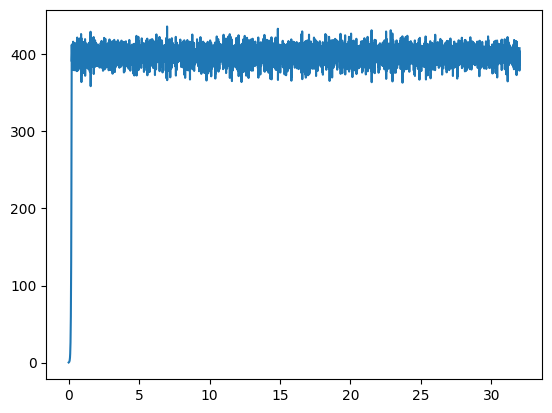

In [4]:
t = 32 # Tiempo Final, se asume Tiempo inicial igual a cero
n_p = 2 ** 12 # Numero de puntos

delta_t = t / (n_p - 1)

dw = np.sqrt(delta_t) * np.random.standard_normal(size = (n_p - 1))
x_t = [x_0]
for i in range(n_p - 1):
    xm1 = x_t[i] + u(1, x_t[i], system_pars) * delta_t + v(1, x_t[i], system_pars) * dw[i]
    x_t.append(xm1)

time = np.linspace(0, t, n_p)
plt.plot(time, x_t)
plt.show()

In [5]:
def solve_logistic(t, n):
    delta_t = t / (n - 1)
    dw = np.sqrt(delta_t) * np.random.standard_normal(size = (n - 1))
    x_t = [x_0]
    for i in range(n - 1):
        xm1 = x_t[i] + u(1, x_t[i], system_pars) * delta_t + v(1, x_t[i], system_pars) * dw[i]
        x_t.append(xm1)
    time = np.linspace(0, t, n)
    return time, x_t

In [6]:
n_samples = 1000

sols = []
for i in range(n_samples):
    time, x_t = solve_logistic(t, n_p)
    dt = time[1] - time[0]
    for j in range(n_p):
        sols.append([i, j, j * dt, x_t[j]])

solution = pd.DataFrame(data = sols, columns = ['samples','n_i',' i * dt','X(t_i)'])
solution.head()

,samples,n_i,i * dt,X(t_i)
0,0,0,0.000000,0.251887
1,0,1,0.007814,0.329822
2,0,2,0.015629,0.434367
3,0,3,0.023443,0.582918
4,0,4,0.031258,0.760691


IndexError: index 4096 is out of bounds for axis 0 with size 4

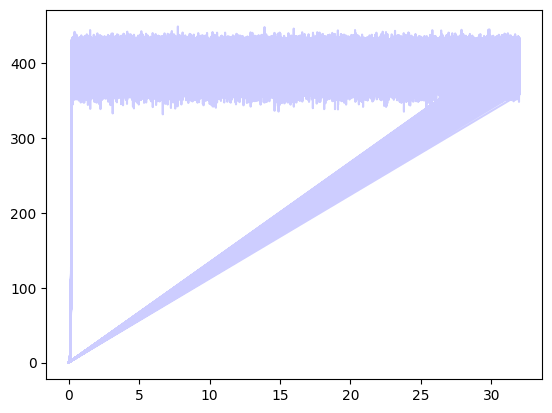

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from mpl_toolkits.axes_grid1 import make_axes_locatable
import os


fig, ax = plt.subplots()
marker_style_00 = dict(
    color="blue",
    linestyle="-",
    # marker="",
    markersize=1,
    markerfacecoloralt="gray",
    alpha=0.1,
)
x_T = []
for j in range(n_samples):
    ax.plot(solution.iloc[j *n_p: (j+1) * n_p, 2], solution.iloc[j *n_p: (j+1) * n_p, 3], **marker_style_00, label=r"$X(t_i)$")
    x_T.append(solution.iloc[j *n_p: (j+1) * n_p -1, 3])

plt.xlabel(r"$t$")
plt.ylabel(r"$X(t)$")

x_T = np.array(x_T)
ymax = np.max(np.abs(x_T))
binwidth = 0.025
lim = (int(ymax / binwidth) + 1) * binwidth
bins = 100  # np.arange(0, lim + binwidth, binwidth)
divider = make_axes_locatable(ax)
ax_histy = divider.append_axes("right", 1.2, pad=0.1, sharey=ax)
n, bins, patches = ax_histy.hist(x_T, bins=bins, orientation="horizontal", density=True)
sigma = np.std(x_T)
mu = np.mean(x_T)
y = (1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(
    -0.5 * ((1.0 / sigma) * (bins - mu)) ** 2
)
# ax_histy.plot(y, bins, "--")
# plt.legend(loc=0)
plt.savefig("gen_log_sde_batch_sample_path.png", dpi=300)

plt.show()



ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

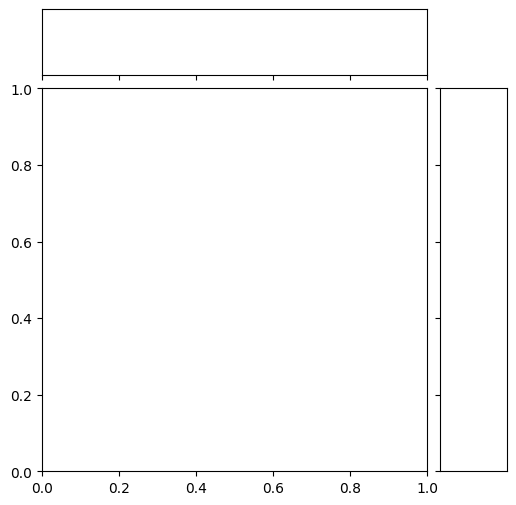

In [ ]:
g = grid = sns.JointGrid(data = solution, x = 't_i', y='X(t_i)')
g.plot_joint(sns.scatterplot)
g.plot_marginals(sns.kdeplot)
g.plot_marginals(sns.histplot)
g.ax_marg_x.remove()
# g = sns.jointplot(data=df_batch_path, x="t_i", y="X(t_i)", marginal_ticks=True)
# sns.kdeplot(df_batch_path["X(t_i)"], ax=g.ax_marg_x, legend=False)
g.savefig("marginal.png")
# plt.show()

